## Skoltech
## Intro to data science, fall 2020
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification task and use classification performance metrics
- Get the taste of gradient boosting approach


# Submiting the answers

Google form to submit your answers: https://docs.google.com/forms/d/1zwUO1KZNDTZYuD12dyMO3CaErGHnZuHx1Mdbo-c11ME/

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then it must be provided with **3 decimals after the floating point**, e.g. 1.234

---

If your answer is a ``list of float or integer numbers or str``, then they should be reported in descending (alphabetical) order,  divided by a comma, e.g.:

10.453,9.112,5.001,5.000

---

The last part (Q5) do not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, ask them piazza topic: https://piazza.com/class/kespugtqfrn12g?cid=29

#### Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

### Dataset
For the task we'll use kickstarter dataset. Kickstarter is the crowdfounding platform, where people can announce their project with financial goals and other can support the projects by paying the money ("pledging"). The goal will be to predict if the project will be successfull, i.e. would it achieve the funding goal. Let's take a brief look to the dataset.

In [2]:
df = pd.read_csv('../input/kickstarter-projects/ks-projects-201801.csv')
df.set_index("ID", inplace=True)

In [3]:
df.sample(5)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1105819724,Fire New MixTape,Latin,Music,USD,2015-10-11,200.0,2015-09-11 08:08:45,10.0,failed,1,US,10.0,10.00,200.00
803877196,HOLD ME DOWN,Drama,Film & Video,USD,2015-07-23,30000.0,2015-06-23 18:04:55,30751.0,successful,150,US,30751.0,30751.00,30000.00
643808904,Addicted To Ink Tattoo - Collectible T-Shirt 1.0,Fashion,Fashion,USD,2011-10-01,1000.0,2011-09-07 23:41:34,0.0,failed,0,US,0.0,0.00,1000.00
614766751,Spot - The coolest HD smart home camera EVER,Gadgets,Technology,USD,2016-01-18,50000.0,2015-12-15 14:03:32,160539.0,successful,1546,US,160539.0,160539.00,50000.00
381466537,Mr. Coleman | Camisas de Caballero (Gentleman ...,Apparel,Fashion,EUR,2016-11-25,7000.0,2016-10-28 12:04:36,537.0,failed,13,ES,0.0,568.79,7414.39


In [4]:
df.shape

(378661, 14)

In [5]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

# Section 1. Dataset acquaintance

-----

### Q1.1

#### How many NaN values are there in the dataset?

In [6]:
df.rename(columns={'usd pledged': 'usd_pledged'}, inplace=True)

In [7]:
df.isna().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd_pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [8]:
print(df[df.name.isna()])
print('\n')
print(df[df.usd_pledged.isna()].shape)

           name        category main_category currency    deadline      goal  \
ID                                                                             
1848699072  NaN  Narrative Film  Film & Video      USD  2012-02-29  200000.0   
634871725   NaN     Video Games         Games      GBP  2013-01-06    2000.0   
648853978   NaN  Product Design        Design      USD  2016-07-18    2500.0   
796533179   NaN        Painting           Art      USD  2011-12-05   35000.0   

                       launched  pledged      state  backers country  \
ID                                                                     
1848699072  2012-01-01 12:35:31    100.0     failed        1      US   
634871725   2012-12-19 23:57:48    196.0     failed       12      GB   
648853978   2016-06-18 05:01:47      0.0  suspended        0      US   
796533179   2011-11-06 23:55:55    220.0     failed        5      US   

            usd_pledged  usd_pledged_real  usd_goal_real  
ID                         

In [9]:
print('Overall NaN:',df.isna().sum().sum())

Overall NaN: 3801


In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(374860, 14)

----

----

Let us simplify the task a little bit: we are aiming to predict either project fails or not.
Thus 'success' projects will be encoded as 1, with state ['failed', 'canceled'] as 0 and we remove the rows with any other state.

### Q1.2 
#### How many '1' values are in resulting dataset (in state column)?

In [12]:
df['state'] = df['state'].apply(lambda x: 1 if x == 'successful'
                                   else 0 if x in ['failed', 'canceled']
                                    else -1)
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00


In [13]:
df.state.value_counts()

 0    236368
 1    133851
-1      4641
Name: state, dtype: int64

In [14]:
#mask = df[df.state == -1]
#df.drop(df[mask], inplace=True)
df = df.drop(df[df.state == -1].index)
df.state.value_counts()

0    236368
1    133851
Name: state, dtype: int64

In [15]:
df[df.state == 1].shape[0]

133851

-----

------

### Q1.3
#### What is a name of a project attracted the biggest pay check? (on average). Use column usd_pledged_real to judge. If there are multiple projects, choose any single one.

In [16]:
print(df.shape)
print(df.name.nunique())
print(df.name.count())

(370219, 14)
367472
370219


In [17]:
df.iloc[1]

name                Greeting From Earth: ZGAC Arts Capsule For ET
category                                           Narrative Film
main_category                                        Film & Video
currency                                                      USD
deadline                                               2017-11-01
goal                                                        30000
launched                                      2017-09-02 04:43:57
pledged                                                      2421
state                                                           0
backers                                                        15
country                                                        US
usd_pledged                                                   100
usd_pledged_real                                             2421
usd_goal_real                                               30000
Name: 1000003930, dtype: object

In [18]:
df.loc[1000003930]

name                Greeting From Earth: ZGAC Arts Capsule For ET
category                                           Narrative Film
main_category                                        Film & Video
currency                                                      USD
deadline                                               2017-11-01
goal                                                        30000
launched                                      2017-09-02 04:43:57
pledged                                                      2421
state                                                           0
backers                                                        15
country                                                        US
usd_pledged                                                   100
usd_pledged_real                                             2421
usd_goal_real                                               30000
Name: 1000003930, dtype: object

In [19]:
gp1 = df.groupby('name')['usd_pledged_real'].sum()
gp2 = df.groupby('name')['backers'].sum()
gp2.replace(0, 1, inplace=True)
print(df['name'].map(gp1))
print(df['name'].map(gp2))
df['pay_check_avg'] = df['name'].map(gp1) / df['name'].map(gp2)
print(df['pay_check_avg'])

ID
1000002330       0.0
1000003930    2421.0
1000004038     220.0
1000007540       1.0
1000011046    1283.0
               ...  
999976400       25.0
999977640      155.0
999986353       20.0
999987933      200.0
999988282      524.0
Name: name, Length: 370219, dtype: float64
ID
1000002330     1
1000003930    15
1000004038     3
1000007540     1
1000011046    14
              ..
999976400      1
999977640      5
999986353      1
999987933      6
999988282     17
Name: name, Length: 370219, dtype: int64
ID
1000002330      0.000000
1000003930    161.400000
1000004038     73.333333
1000007540      1.000000
1000011046     91.642857
                 ...    
999976400      25.000000
999977640      31.000000
999986353      20.000000
999987933      33.333333
999988282      30.823529
Name: pay_check_avg, Length: 370219, dtype: float64


In [20]:
mask = df['backers'] != 0
mask2 = df[mask].pay_check_avg == df[mask].pay_check_avg.max()
print(df[mask][mask2].name)

ID
1459482568                   Patented (9 seasons) food enhancer
1767293256                                  KIRISUTOS PACHYDERM
1974395971    21st CENTURY MEDICAL PRACTICE SYSTEM THAT CHAN...
2024799289                                The Commoner Princess
281085395     "SUNBURN" - starring Michael Madsen, indie act...
472233286     Hollow Earth Project, Journey to the center of...
642968820                          Nobody: The Movie (Canceled)
889803741           Post Traumatic Stress (PTSD) Affects Us All
912587650              The Hare On The Chair - An Easter Legend
Name: name, dtype: object


In [21]:
df.drop(columns=['pay_check_avg'], inplace=True)
df.columns

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'goal',
       'launched', 'pledged', 'state', 'backers', 'country', 'usd_pledged',
       'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

-----

-----

### Q1.4
#### What is the most successful main category (in terms of success percentage)?

In [22]:
df.state.value_counts()

0    236368
1    133851
Name: state, dtype: int64

In [23]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00


In [24]:
gp = df.groupby('main_category')['state'].mean()
df['successful_cats'] = df['main_category'].map(gp)
print(df[df['successful_cats'] == df['successful_cats'].max()].main_category.iloc[0])

Dance


In [25]:
#Just for check

#grupp = df.groupby('main_category')['state'].sum()
#grupp2 = df.groupby('main_category')['state'].count()
#print(grupp)
#print(grupp2)
#grupp/grupp2

In [26]:
gp[gp == gp.max()].index[0]

'Dance'

In [27]:
df.drop(columns=['successful_cats'], inplace=True)
print(df.columns)

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'goal',
       'launched', 'pledged', 'state', 'backers', 'country', 'usd_pledged',
       'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


-----

-----

### Q1.5
#### Define the category with highest goal per project. How many projects belong to it?  (note: we use category here, not main_category)

In [28]:
gp = df.groupby(['category'])['goal'].sum()
gp2 = df.groupby(['category'])['name'].count()
#df['goal_per_cat'] = df['category'].map(gp)

In [29]:
print(gp)
print(gp2)

category
3D Printing     31731427.0
Academic        51508835.0
Accessories     58565631.0
Action         247877566.0
Animals          2929691.0
                  ...     
Woodworking     14620002.0
Workshops        2063155.0
World Music     62628409.5
Young Adult    120614302.0
Zines            4024676.0
Name: goal, Length: 159, dtype: float64
category
3D Printing     659
Academic        892
Accessories    3080
Action          730
Animals         247
               ... 
Woodworking    1150
Workshops       158
World Music    2083
Young Adult     806
Zines           381
Name: name, Length: 159, dtype: int64


In [30]:
goal_per_proj = gp/gp2
print(goal_per_proj.value_counts())

11790.602286     1
141259.404255    1
183055.071146    1
12248.337148     1
19362.939502     1
                ..
81164.550890     1
62621.831493     1
11589.957586     1
55893.124630     1
19695.089474     1
Length: 159, dtype: int64


In [31]:
goal_per_proj[goal_per_proj == goal_per_proj.max()]

category
Movie Theaters    1.594601e+06
dtype: float64

In [32]:
gp2[goal_per_proj[goal_per_proj == goal_per_proj.max()].index]

category
Movie Theaters    227
Name: name, dtype: int64

-----

-----

### Q1.6
#### What is the category with biggest total pledge? Use 'usd_pledged_real' to judge.

In [33]:
gp = df.groupby('category')['usd_pledged_real'].sum()
print(gp)

category
3D Printing    44778049.93
Academic        2644062.03
Accessories    20420784.20
Action          2735669.60
Animals          763045.98
                  ...     
Woodworking     1856668.83
Workshops        269728.16
World Music     8809101.13
Young Adult     1029530.76
Zines           1006978.23
Name: usd_pledged_real, Length: 159, dtype: float64


In [34]:
gp[gp == gp.max()]

category
Product Design    6.284380e+08
Name: usd_pledged_real, dtype: float64

------

------

As one can notice, there are both numerical and object-type data in our dataframe. 

We suggest you to split them to perform EDA separately. 

### Q1.7
#### Split columns to 'numeric' (by data type) and object-type. How many 'object-type' features are there?

In [35]:
numeric_cols = []
object_type_cols = []
for col in df.columns:
    if df[col].dtypes == 'object':
        object_type_cols.append(col)
    else:
        numeric_cols.append(col)
print('Numeric:',numeric_cols)
print('Object:',object_type_cols)

Numeric: ['goal', 'pledged', 'state', 'backers', 'usd_pledged', 'usd_pledged_real', 'usd_goal_real']
Object: ['name', 'category', 'main_category', 'currency', 'deadline', 'launched', 'country']


In [36]:
len(object_type_cols)

7

### Q1.8
#### Let's do a bit of feature engineering. Let's create column 'pledge2goal' which define as ratio of usd_pledged_real to goal. How many outliers are there?
#### (We use a simple rule: an object is an outlier if it does not belong to [q25 - 1.5iqr, q75 + 1.5 iqr] interval, where qxx -- xx quantile, and iqr is inter-quantile range.)

In [37]:
df['pledge2goal'] = df[['usd_pledged_real', 'goal']].apply(lambda x: x[0] / x[1], axis=1)
q25 = df['pledge2goal'].quantile(0.25)
q75 = df['pledge2goal'].quantile(0.75)
iqr = q75 - q25

In [38]:
print(q25 - 1.5*iqr, q75 + 1.5*iqr)

-1.597427857142857 2.674571


In [39]:
df[(df['pledge2goal'] < q25 - 1.5 * iqr) | (df['pledge2goal'] > q75 + 1.5 * iqr)].shape[0]

18415

In [40]:
data = df.drop(df[(df['pledge2goal'] < q25 - 1.5 * iqr) | (df['pledge2goal'] > q75 + 1.5 * iqr)].index)
print(df.shape)
print(data.shape)

(370219, 15)
(351804, 15)


### Q1.9
#### Visualize the feature for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the ratio matters.
- B. Distributions have almost no intersection, the bigger ratio, the bigger success.
- C. Distributions intersect significantly, the bigger ratio, the bigger success
- D. Distributions have almost no intersection, the less ratio, the bigger success.

#### B is suitable

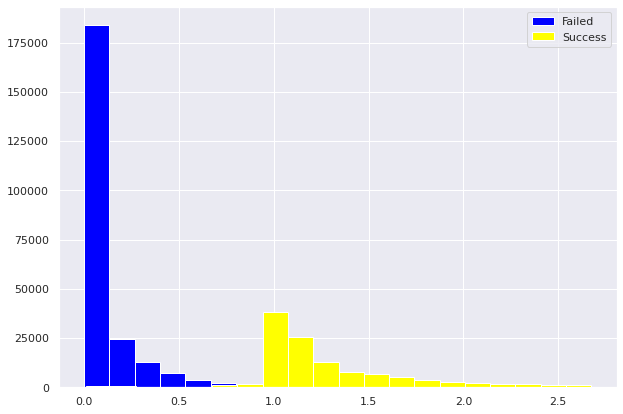

In [41]:
#If seaborn.histplot doesn't work
pledge2goal_0 = df[(df['pledge2goal'] > q25 - 1.5 * iqr) & (df['pledge2goal'] < q75 + 1.5 * iqr) & (df.state == 0)].pledge2goal
pledge2goal_1 = df[(df['pledge2goal'] > q25 - 1.5 * iqr) & (df['pledge2goal'] < q75 + 1.5 * iqr) & (df.state == 1)].pledge2goal

plt.figure(figsize = (10, 7))
plt.hist(pledge2goal_0, bins = 20, color = 'blue', label='Failed')
plt.hist(pledge2goal_1, bins = 20, color = 'yellow', label='Success')
plt.legend()
plt.show()

In [42]:
#plt.figure(figsize = (10, 7))
#sns.histplot(df[df.state == 0].pledge2goal, bins = 20, 
#             binrange = [q25 - 1.5*iqr, q75 + 1.5*iqr], color = 'blue', label='Failed')
#sns.histplot(df[df.state == 1].pledge2goal, bins = 20, 
#             binrange = [q25 - 1.5*iqr, q75 + 1.5*iqr], color = 'yellow', label='Success')
#plt.legend()
#plt.show()

-----

-----

### Q1.10
#### Continue with plot from Q1.9. Where are the peaks located? We expect two numbers here as the answer

In [43]:
print(data[data.state == 0].pledge2goal.value_counts().idxmax())
print(data[data.state == 1].pledge2goal.value_counts().idxmax())

0.0
1.0


-----

-----

### Q1.11
#### Compute Pearson correlation coefficient between the pledge2real and target variable.

In [44]:
data.corr(method='pearson')

,goal,pledged,state,backers,usd_pledged,usd_pledged_real,usd_goal_real,pledge2goal
goal,1.000000,0.012888,-0.023853,0.005921,0.010573,0.010819,0.939059,-0.026670
pledged,0.012888,1.000000,0.151061,0.539310,0.569334,0.693046,0.006297,0.142216
state,-0.023853,0.151061,1.000000,0.201237,0.197329,0.221998,-0.022714,0.902114
backers,0.005921,0.539310,0.201237,1.000000,0.809864,0.834607,0.006679,0.233633
usd_pledged,0.010573,0.569334,0.197329,0.809864,1.000000,0.941128,0.012157,0.222616
usd_pledged_real,0.010819,0.693046,0.221998,0.834607,0.941128,1.000000,0.011822,0.249617
usd_goal_real,0.939059,0.006297,-0.022714,0.006679,0.012157,0.011822,1.000000,-0.024772
pledge2goal,-0.026670,0.142216,0.902114,0.233633,0.222616,0.249617,-0.024772,1.000000


In [45]:
data[['pledge2goal', 'state']].corr(method='pearson')['pledge2goal']['state']

0.9021138734010133

In [46]:
#with outliers
df[['pledge2goal', 'state']].corr(method='pearson')['pledge2goal']['state']

0.014808549322307686

-----

### Q1.12
#### Visualize dependancy of numerical data with success. What can you say about it?

In [47]:
if 'pledge2goal' not in numeric_cols:
    numeric_cols.append('pledge2goal')

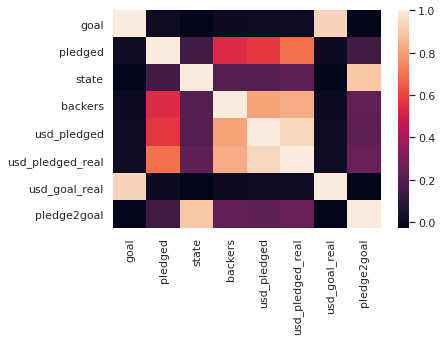

In [48]:
corr = data[numeric_cols].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

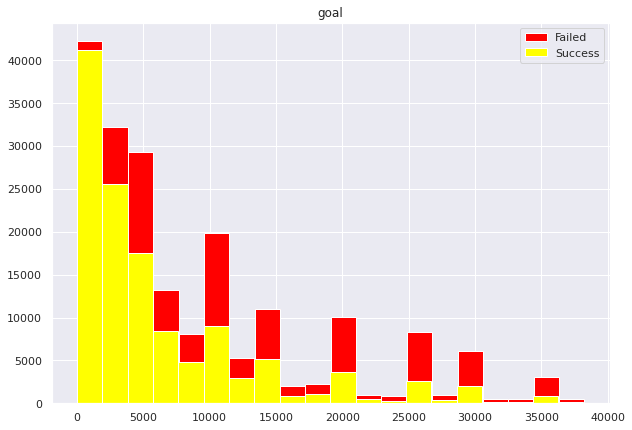

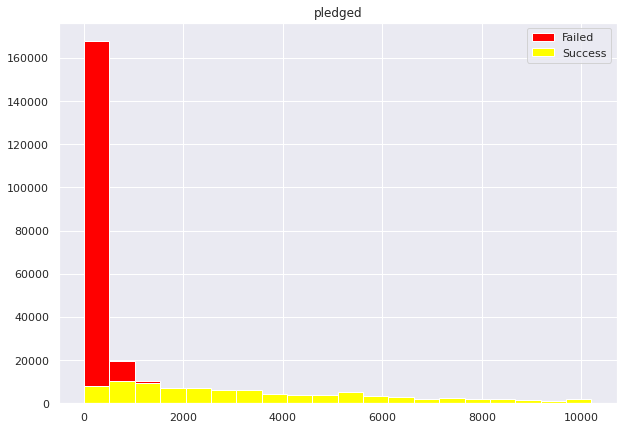

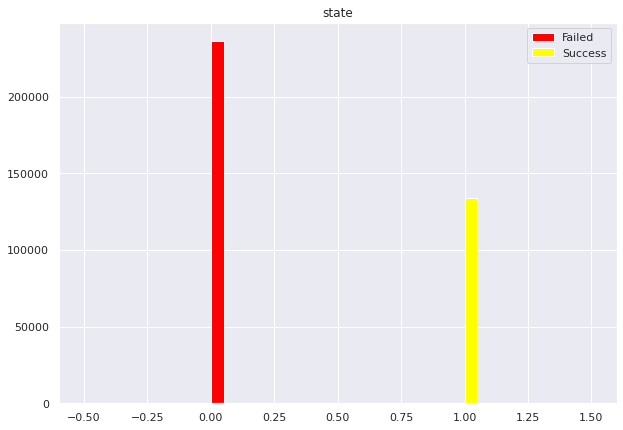

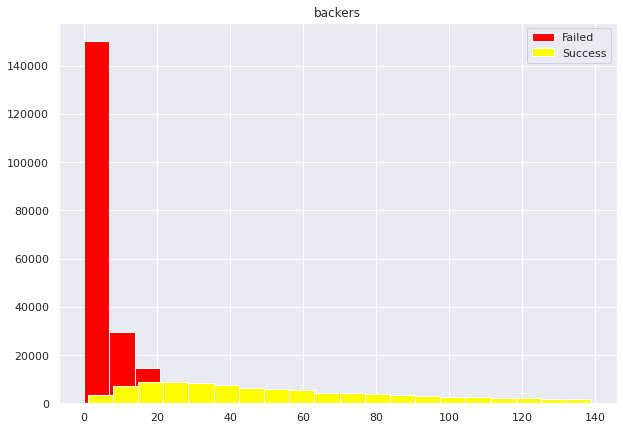

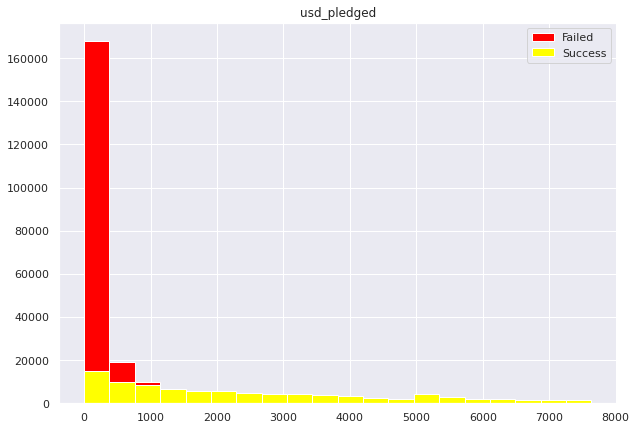

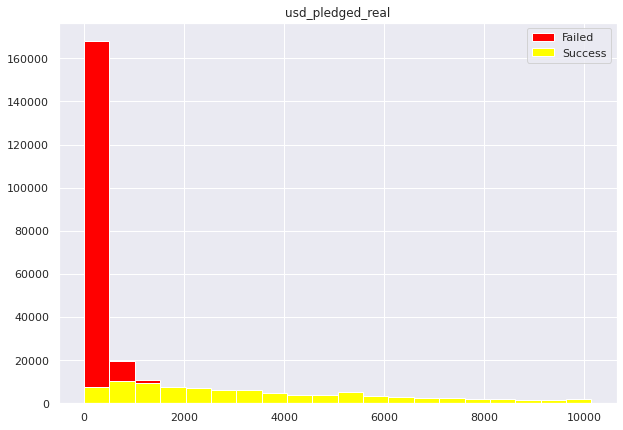

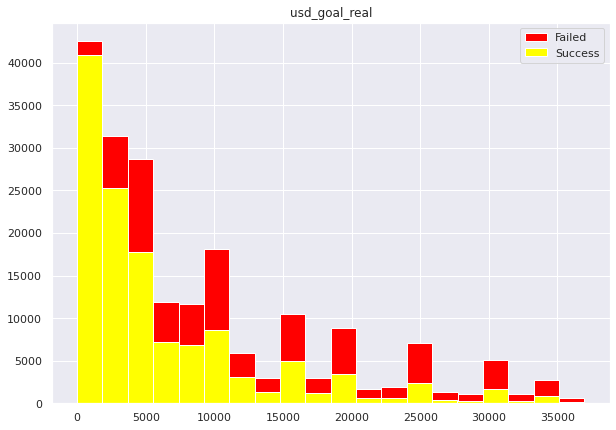

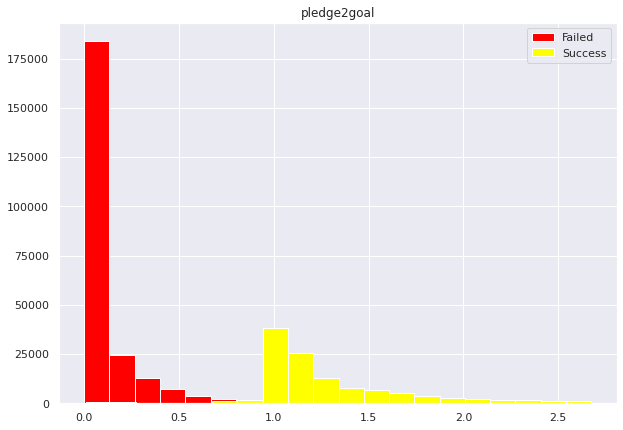

In [49]:
for i in range(len(numeric_cols)):
    q25 = df[numeric_cols[i]].quantile(0.25)
    q75 = df[numeric_cols[i]].quantile(0.75)
    iqr = q75 - q25
    col1 = df[(df.state == 0) & (df[numeric_cols[i]] > q25 - 1.5*iqr) & (df[numeric_cols[i]] < q75 + 1.5*iqr)][numeric_cols[i]]
    col2 = df[(df.state == 1) & (df[numeric_cols[i]] > q25 - 1.5*iqr) & (df[numeric_cols[i]] < q75 + 1.5*iqr)][numeric_cols[i]]
    plt.figure(figsize = (10, 7))
    #sns.histplot(df[df.state == 0][numeric_cols[i]], 
    #             binrange = [q25 - 1.5*iqr, q75 + 1.5*iqr], bins=20, color = 'red', label='Failed')
    #sns.histplot(df[df.state == 1][numeric_cols[i]], 
    #             binrange = [q25 - 1.5*iqr, q75 + 1.5*iqr], bins=20, color = 'yellow', label='Success')
    plt.hist(col1, bins=20, color = 'red', label='Failed')
    plt.hist(col2, bins=20, color = 'yellow', label='Success')
    plt.title(numeric_cols[i])
    plt.legend()
    plt.show()

### Columns 'goal' and 'usd_real_goal' do not correlate much with the state because the distributions for state== 0 and state== 1 are quite similar. 
### On the countrary, 'pledge2goal' is really informative because the distributions for state== 0 and state== 1 almost don't intersect. 
### Columns 'pledged', 'backers', 'usd_pledged', 'usd_pledged_real' all have very similar distributions in general and are more informative than 'goal' and 'usd_real_goal' but less than 'pledge2goal'. The results for the "failed" state are more focused on values close to 0, while for the "success" state they are more smeared, and quite evenly distributed over a wide range of values.

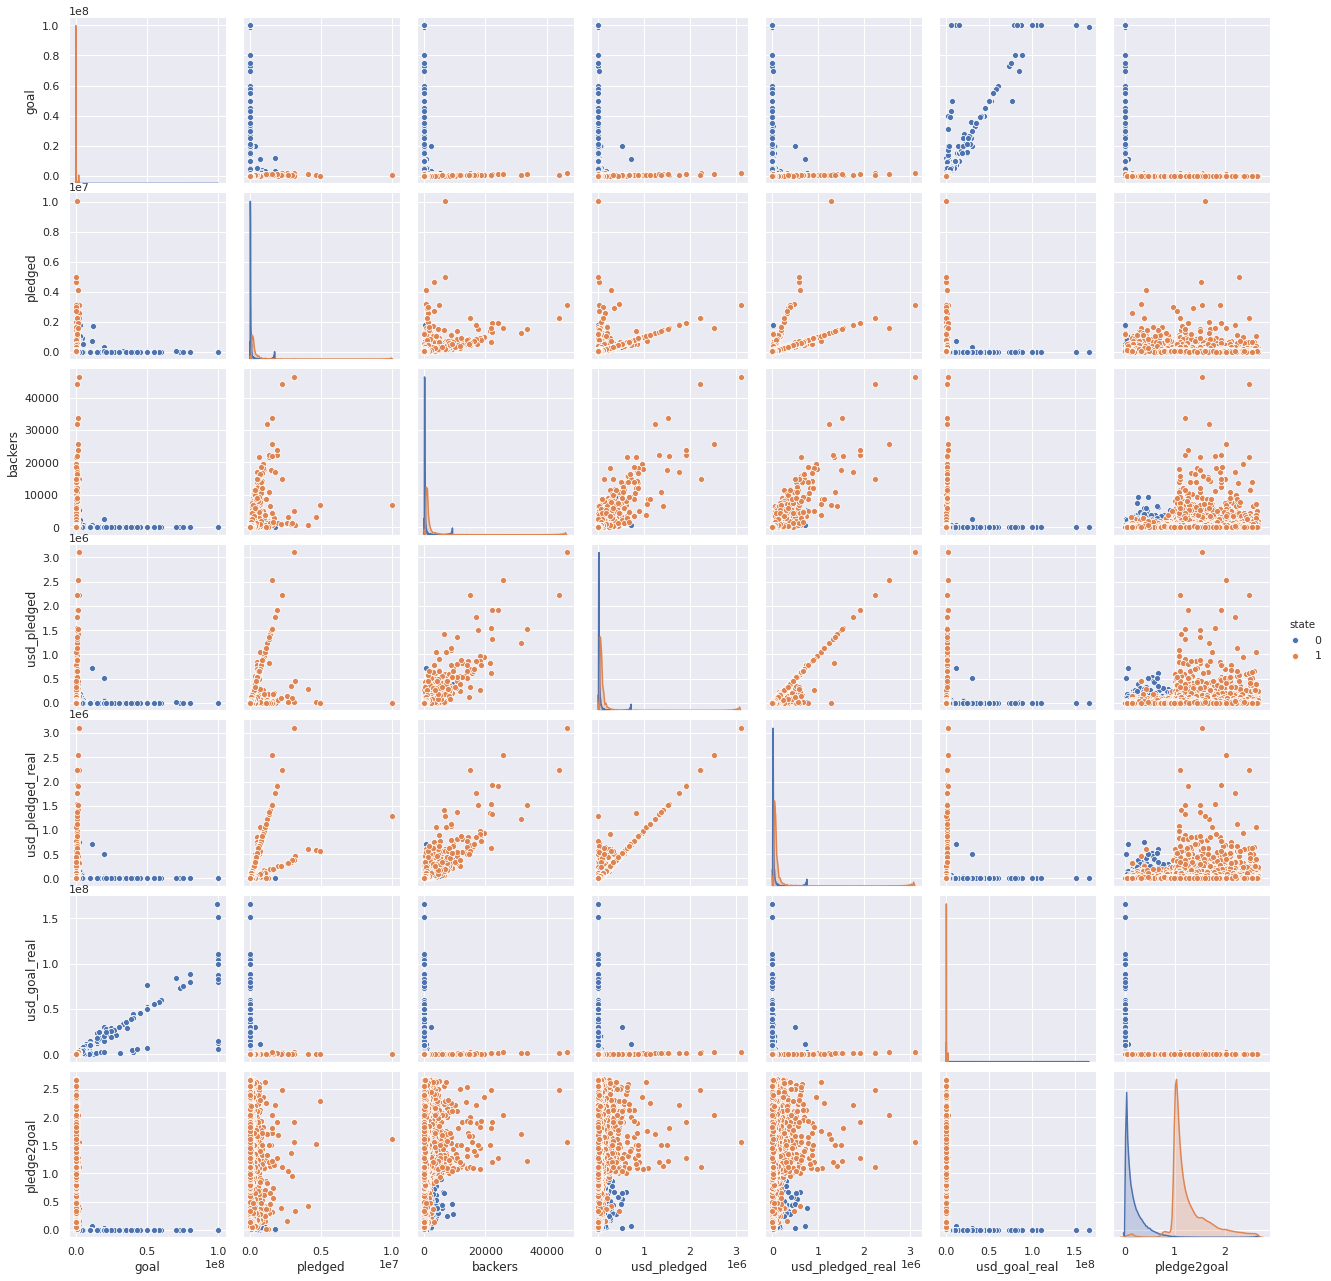

In [50]:
sns.pairplot(data[numeric_cols], hue='state')

# Feature generation
Lets' generate some more feature that could be useful

### Q2.1 Create a year column that would hold the year. How many projects were in year 2012?

In [51]:
df.launched = pd.to_datetime(df.launched)
df['year_launched'] = df.launched.dt.year

In [52]:
print(df[df.year_launched == 2012].name.nunique())

41027


In [53]:
#we take this
df[df.year_launched == 2012].name.shape

(41109,)

### Q2.2 Make a column 'duration_days' with number of full days from launch to deadline.
What is median value for this column?

In [54]:
df.deadline = pd.to_datetime(df.deadline)

In [55]:
df['duration_days'] = (df.deadline - df.launched).dt.days
print(df.duration_days.mean())

33.40779916751976


In [56]:
#Example
#df.duration_days.loc[1000003930]

In [57]:
df.duration_days.median()

29.0

### Q2.3 Delete mistaken value from column 'country'. What is the value?

In [58]:
df.country.value_counts()

US    289669
GB     33214
CA     14508
AU      7681
DE      4057
FR      2873
NL      2807
IT      2775
ES      2204
SE      1718
MX      1632
NZ      1425
DK      1083
IE       793
CH       736
NO       694
BE       597
AT       576
HK       564
SG       521
LU        61
JP        31
Name: country, dtype: int64

In [59]:
df = df.drop(df[df.country == 'N,0"'].index)
#df.country.value_counts()

In [60]:
df.shape

(370219, 17)

### Q2.4 Make column 'region' out of column country (america, europe, asia, oceania(including australiza/nz))
Where is the region with the worst conversion rate (percentage of successful projects)

In [61]:
df.country.unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NL', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'LU', 'SG', 'JP'],
      dtype=object)

In [62]:
df['region'] = df['country'].apply(lambda x: 'America' if x in ['US', 'CA', 'MX']
                                    else 'Asia' if x in ['HK', 'SG', 'JP']
                                    else 'Oceania' if x in ['AU', 'NZ']
                                    else 'Europe')
#else 'Europe' if x in ['GB', 'NO', 'IT', 'DE', 'IE', 'ES', 'SE', 'FR', 'NL', 'CH', 'AT', 'BE', 'DK', 'LU']

In [63]:
df['region'].value_counts()

America    305809
Europe      54188
Oceania      9106
Asia         1116
Name: region, dtype: int64

In [64]:
gp = df.groupby('region')['state'].mean()
df['successful_regs'] = df['region'].map(gp)
print(df[df['successful_regs'] == df['successful_regs'].min()].region.iloc[0])

Oceania


In [65]:
df.drop(columns = ['successful_regs'], inplace=True)

In [66]:
#for checking

#grupp = df.groupby('region')['state'].sum()
#grupp2 = df.groupby('region')['name'].count()
#print(grupp)
#print(grupp2)
#grupp/grupp2

### Q2.5 For each main_category leave only the three most popular category and replace other with "other"
What is the most frequent subcategory for design?

In [67]:
replaced_cats = {}
categories = df.groupby(['main_category', 'category'])['name'].count()
for cat in df.main_category.unique():
    replaced_cats[cat] = []
    for minicat in df.category.unique():
        if ((minicat in categories[cat]) and 
                (minicat not in categories[cat].sort_values(ascending=False)[0:3])):
            #print(cat, minicat)
            #categories[cat].replace(minicat, 'other', inplace=True)
            replaced_cats[cat].append(minicat)
print(categories)

main_category  category      
Art            Art               8155
               Ceramics           302
               Conceptual Art    1016
               Digital Art       1329
               Illustration      3125
                                 ... 
Theater        Immersive          323
               Musical            906
               Plays             1363
               Spaces             212
               Theater           7036
Name: name, Length: 170, dtype: int64


In [68]:
categories['Film & Video']

category
Action               730
Animation           2519
Comedy              2090
Documentary        16065
Drama               2140
Experimental         541
Family               330
Fantasy              337
Festivals            287
Film & Video        9149
Horror              1270
Movie Theaters       227
Music Videos         701
Narrative Film      5168
Romance              186
Science Fiction      735
Shorts             12303
Television          1000
Thrillers            734
Webseries           5735
Name: name, dtype: int64

In [69]:
df['main_cat'] = df[['main_category', 'category']].apply(lambda x: x[1] if x[1] not in replaced_cats[x[0]]
                                                        else 'other', axis=1)
df['category'] = df['main_cat']
df.drop(columns = ['main_cat'], inplace=True)

In [70]:
#print(df['category'].value_counts())

In [71]:
df[df.main_category == 'Design'].category.value_counts().sort_values(ascending=False)[0:3].index[0]

'Product Design'

### Q2.6 create the columns "name_length" with length of the name.
What is the biggets length?

In [72]:
df['name_length'] = df['name'].astype('str').apply(lambda x: len(x))
#df.name_length.median()

In [73]:
df.name_length.max()

96

# Preprocessing

### Q3.1 Drop the leaking columns
Based on what we have already seen, can you assume what features are leakeges? What is the columns? Drop them


In [74]:
df.columns

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'goal',
       'launched', 'pledged', 'state', 'backers', 'country', 'usd_pledged',
       'usd_pledged_real', 'usd_goal_real', 'pledge2goal', 'year_launched',
       'duration_days', 'region', 'name_length'],
      dtype='object')

In [75]:
cols_to_drop = ['pledged', 'backers', 'usd_pledged', 'usd_pledged_real', 'pledge2goal']

In [76]:
df.drop(columns=cols_to_drop, inplace=True)

In [77]:
df.shape

(370219, 14)

### Q3.2 Deal with the categorical features.
Lets drop some more columns for now (name, deadline, launched, country, usd_goal_real). Note: you can re-use these columns in the Q5 section. 
Preprocess the rest of categorical columns. How many columns do you have now?

In [78]:
data = df.drop(columns=['name', 'deadline', 'launched', 'country', 'usd_goal_real'])
data.shape

(370219, 9)

In [79]:
data.columns

Index(['category', 'main_category', 'currency', 'goal', 'state',
       'year_launched', 'duration_days', 'region', 'name_length'],
      dtype='object')

In [80]:
data.shape[1]

9

In [81]:
cat_features = ['category', 'main_category', 'currency', 'region']

num_features = ['goal', 'year_launched', 'duration_days', 'name_length']

In [82]:
#Preprocessing: onehot
data = pd.get_dummies(data, columns=cat_features)
print(data.head())

               goal  state  year_launched  duration_days  name_length  \
ID                                                                      
1000002330   1000.0      0           2015             58           31   
1000003930  30000.0      0           2017             59           45   
1000004038  45000.0      0           2013             44           14   
1000007540   5000.0      0           2012             29           49   
1000011046  19500.0      0           2015             55           58   

            category_Accessories  category_Apparel  category_Apps  \
ID                                                                  
1000002330                     0                 0              0   
1000003930                     0                 0              0   
1000004038                     0                 0              0   
1000007540                     0                 0              0   
1000011046                     0                 0              0   

    

In [83]:
#Preprocessing: onehot
#from sklearn.preprocessing import OneHotEncoder

#ohe = OneHotEncoder(sparse=False)
#encoded_feat = pd.DataFrame(ohe.fit_transform(X_cat))

#cat_cols = [f'category_{cat}' for cat in ohe.categories_[0]]
#main_cat_cols = [f'main_category_{cat}' for cat in ohe.categories_[1]]
#curr_cols = [f'currency_{cat}' for cat in ohe.categories_[2]]
#reg_cols = [f'region_{cat}' for cat in ohe.categories_[3]]


#names_for_cols = [*cat_cols, *main_cat_cols, *curr_cols, *reg_cols]
#encoded_feat.columns = names_for_cols

#X = pd.concat([X_num, encoded_feat], axis=1)

In [84]:
X = data.drop(['state'], axis=1)
y = data.state
print(X.shape)
print(y.shape)

(370219, 82)
(370219,)


### Q3.3 Split the dataset
Separate the target column (state) without stratification and with random state 42 and test size 0.2. How many of successful projects in train set?

In [85]:
from sklearn.model_selection import train_test_split
#train_test_split(df.drop(['state'], axis=1), df.state, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
y_train[y_train == 1].count()

107134

In [87]:
y_train[y_train == 1].shape

(107134,)

### Q3.4 Scale the numeric columns with standard scaler
What is max number in goal field after scaling?

In [88]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [89]:
scaler = StandardScaler()
scaler.fit(X_train[num_features])
X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [90]:
X_train.goal.max()

93.26426315218663

In [91]:
#X_train[X_train.goal == X_train.goal.max()]

# Feature selection

### Q4.1 Estimate feature importance by Anova
What is the two most important features by anova with f classifier?

In [92]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

In [93]:
selector = SelectKBest(f_classif, k=2)
selector.fit(X_train, y_train)
# SelectKBest just selects the specified number of features with the highest scores 
#print(X_train.shape) 
#X_reduced = selector.transform(X_train)
#print(X_reduced.shape)
#print(selector.scores_)

SelectKBest(k=2)

In [94]:
#selector.scores_.max()

In [95]:
max_score_ind = 0
for i in range(len(selector.scores_)):
    if ((selector.scores_[i] > selector.scores_[max_score_ind]) and i != selector.scores_.argmax()):
        max_score_ind = i
print(max_score_ind, selector.scores_[max_score_ind])

62 3108.61585281777


In [96]:
selector.scores_.argmax()

59

In [97]:
X_train.columns[[selector.scores_.argmax(), max_score_ind]]

Index(['main_category_Music', 'main_category_Technology'], dtype='object')

## Build a model with logistic regression

Use l2 penalty and search for optimal C in np.logspace(-2, 4, 7).

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report

In [99]:
#LogisticRegression?

In [100]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(Cs = np.logspace(-2, 4, 7), cv=5, n_jobs=-1, max_iter=300,
                           penalty='l2', random_state=42).fit(X_train, y_train)
print(clf.predict(X_test))
print(clf.predict_proba(X_test).shape)
print(clf.score(X_train, y_train))
print(clf.C_)

[0 0 0 ... 1 1 0]
(74044, 2)
0.67871022199713
[1.]


In [101]:
parameters = {'C':np.logspace(-2, 4, 7)}
lr = LogisticRegression(penalty='l2', n_jobs=-1, max_iter=300)
    
gs = GridSearchCV(lr, parameters, n_jobs=-1, cv=5, verbose=50)
gs.fit(X_train, y_train)
print('Grid search best parameters:', gs.best_params_)
print('Grid search best score:', gs.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.2

In [102]:
C_opt=clf.C_[0]
#C_opt = gs.best_estimator_.C
print(C_opt)

1.0


In [103]:
print(classification_report(gs.best_estimator_.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78     58895
           1       0.34      0.60      0.43     15149

    accuracy                           0.68     74044
   macro avg       0.60      0.65      0.60     74044
weighted avg       0.76      0.68      0.71     74044



0.3377250439794887 0.5956168724008185


(0.0, 1.0)

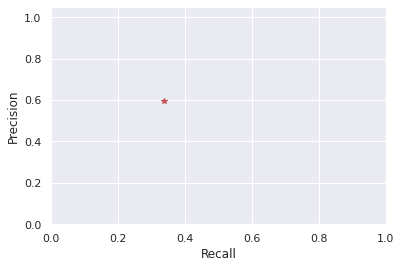

In [104]:
clf = LogisticRegression(penalty='l2', C=C_opt, n_jobs=-1, max_iter=300,
                            random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(recall_score(y_test, y_pred), precision_score(y_test, y_pred))
plt.plot(recall_score(y_test, y_pred), precision_score(y_test, y_pred), '*r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

------

### Q4.2 What is an optimal C for l2 regularization?

In [105]:
print(C_opt)

1.0


### Q4.3 What is the accuracy for this params?

In [106]:
clf.score(X_test, y_test)

0.6782993895521582

------

### Q4.4 What is the two most important features by logistic regression estimation?

In [107]:
#clf.coef_
features_imp = []
array = np.abs(clf.coef_)[0]
#print(array)
for _ in range(2):
    features_imp.append(np.argmax(array))
    array[np.argmax(array)] = 0.
#print(features_valuable)

print(X.columns[features_imp])

Index(['goal', 'currency_JPY'], dtype='object')


### Q4.5 Build roc curve and calculate roc-auc score. What is the roc-auc score?

Text(0.5, 1.0, '2-class ROC curve: ROC AUC=0.60')

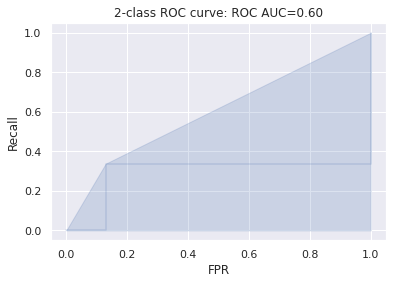

In [108]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.step(fpr, tpr, color='b', alpha=0.2, where='post')
plt.fill_between(fpr, tpr, alpha=0.2, color='b')

plt.xlabel('FPR')
plt.ylabel('Recall')
plt.title('2-class ROC curve: ROC AUC={0:0.2f}'.format(roc_auc_score(y_test, y_pred)))

------

## Build a random forest model
Use random state 42, maximum depth from 2 to 15, and number of estimators in `[10, 20, 50, 100, 200]`

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [110]:
#Auto GS
parameters = {'n_estimators':[10, 20, 50, 100, 200], 'max_depth':range(2, 16)} #'max_features': [10, 15, 20]}
model = RandomForestClassifier(random_state=42) 

rf = GridSearchCV(model, parameters, n_jobs=-1, cv=5, verbose=50)
rf.fit(X_train, y_train)
print('Grid search best parameters:', rf.best_params_)
print('Grid search best score:', rf.best_score_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 131 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.5min
[Paralle

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed: 32.6min
[Paralle

In [111]:
#best_params = {'max_depth': 15, 'n_estimators': 100}
#best_score = 0.6910002532286654

In [112]:
#manual GS: beautiful graphics

#plt.figure(figsize=(12, 10))
#accuracy_all = np.zeros((5, 14))
#i = j = 0

#for n_est in [10, 20, 50, 100, 200]:
#    for depth in range(2, 16):
#        model = RandomForestClassifier(n_estimators=n_est, max_depth=depth, random_state=42) #

#        model.fit(X_train, y_train)
#        y_pred = model.predict(X_test)
#        accuracy_all[i, j] = accuracy_score(y_test, y_pred)
#        j += 1
#    plt.plot(range(2, 16), accuracy_all[i, :], label=str(n_est))
#    plt.legend()
#    j = 0
#    i += 1
    
#plt.title('Random Forest accuracy')
#plt.show()


------

### Q4.6 What is an optimal depth and number of trees?

In [113]:
#manual grid search

#Estimators=[10, 20, 50, 100, 200]
#Depth=range(2, 16)

#estimators_opt = Estimators[int(accuracy_all.argmax()/14)]
#depth_opt = Depth[accuracy_all.argmax()%14]
#print('Num estimators:', estimators_opt)
#print('Depth:', depth_opt)

In [114]:
print(rf.best_params_)

estimators_opt = rf.best_params_['n_estimators']
max_depth_opt = rf.best_params_['max_depth']

{'max_depth': 15, 'n_estimators': 100}


### Q4.7 What is the accuracy for this params?

In [115]:
model_opt = RandomForestClassifier(n_estimators=estimators_opt, max_features=20, 
                                   max_depth=max_depth_opt, random_state=42) 
model_opt.fit(X_train, y_train)
y_pred = model_opt.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6971530441359192


### Q4.8 Build precision-recall curve. What is the precision for recall 0.5?

In [116]:
y_test_2 = np.zeros((X_test.shape[0], 2))
for i in range(X_test.shape[0]):
    y_test_2[i, y_test.iloc[i]] = 1
    y_test_2[i, 1 - y_test.iloc[i]] = 0

In [117]:
y_prob = model_opt.predict_proba(X_test)

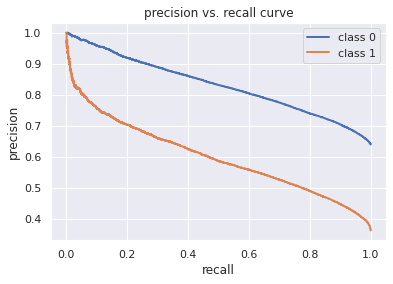

In [118]:
# precision recall curve
precision = dict()
recall = dict()
for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(y_test_2[:, i],
                                                        y_prob[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [119]:
pred_prob = y_prob[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, pred_prob)
amin = np.argmin([np.abs(i - 0.5) for i in recall])

print('On recall',recall[amin], 'presicion is', precision[amin])

On recall 0.500018714676049 presicion is 0.5859724537240109


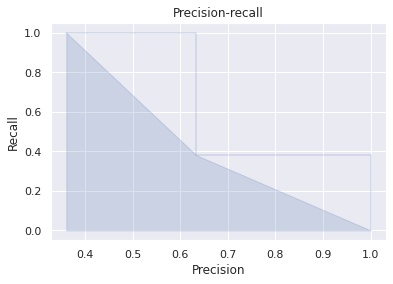

In [120]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
#print(precision, recall)
plt.step(precision, recall, color='b', alpha=0.2, where='post')
plt.fill_between(precision, recall, alpha=0.2, color='b')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall')#={0:0.2f}'.format(precision_recall_curve(y_test, y_pred)[:1))
plt.show()

### Q4.9 What is the two most important features by random forest?

In [121]:
importances = model_opt.feature_importances_
#importances
features_imp = []
array = np.abs(model_opt.feature_importances_)
#print(array)
for _ in range(5):
    features_imp.append(np.argmax(array))
    array[np.argmax(array)] = 0.
#print(features_valuable)

print(X_test.columns[features_imp][:2])

Index(['goal', 'duration_days'], dtype='object')


------

------

# Build the stronger model

### Q5.1 Generate two (or more) meaningfull features

In [122]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,state,country,usd_goal_real,year_launched,duration_days,region,name_length
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,other,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0,GB,1533.95,2015,58,Europe,31
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,other,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,0,US,30000.00,2017,59,America,45
1000004038,Where is Hank?,other,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,0,US,45000.00,2013,44,America,14
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,0,US,5000.00,2012,29,America,49
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,0,US,19500.00,2015,55,America,58


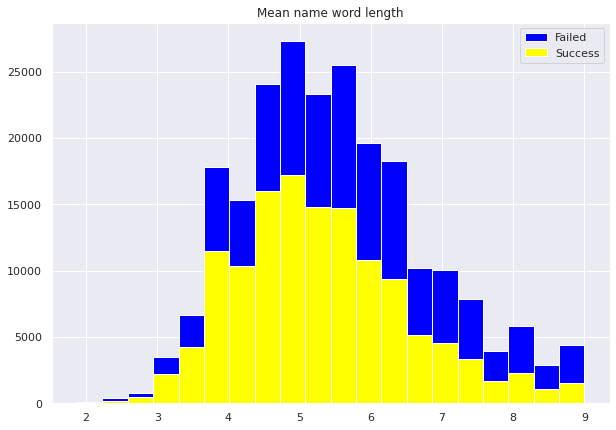

In [123]:
#Calculate the mean length of the words in the name

def mean_name_word_length(x):
    mean_length = 0
    name_list = x.split(' ')
    for i in range(len(name_list)):
        mean_length += len(name_list[i])
    mean_length /= len(name_list)
    return mean_length

df['mean_name_word_length'] = df['name'].apply(mean_name_word_length)


q25 = df['mean_name_word_length'].quantile(0.25)
q75 = df['mean_name_word_length'].quantile(0.75)
iqr = q75 - q25


name_length_0 = df[(df['mean_name_word_length'] > q25 - 1.5 * iqr) 
                   & (df['mean_name_word_length'] < q75 + 1.5 * iqr) 
                   & (df.state == 0)].mean_name_word_length
name_length_1 = df[(df['mean_name_word_length'] > q25 - 1.5 * iqr)
                   & (df['mean_name_word_length'] < q75 + 1.5 * iqr)
                   & (df.state == 1)].mean_name_word_length


plt.figure(figsize = (10, 7))
plt.hist(name_length_0, bins = 20, color = 'blue', label='Failed')
plt.hist(name_length_1, bins = 20, color = 'yellow', label='Success')
plt.title('Mean name word length')
plt.legend()
plt.show()

#### Not very meaningful but the peaks are in different values so it may be useful

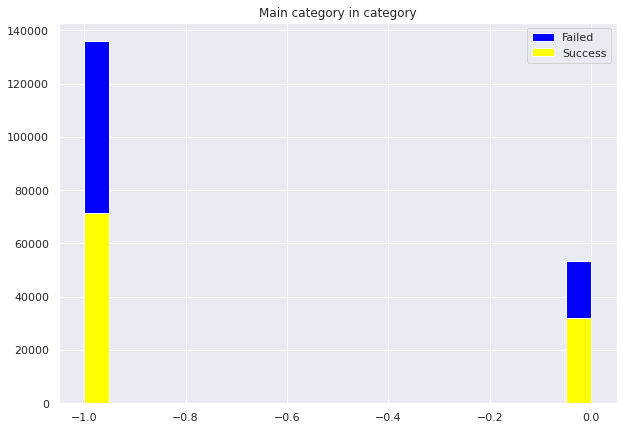

In [124]:
# Turned out to be not meaningful

df['cat_in_subcat'] = df[['main_category', 'category']].apply(lambda x: max(x[1].rfind(x[0]), 
                                                                            x[1].rfind(x[0][:-1]), 
                                                                            x[1].rfind(x[0][:-2]),
                                                                            x[1].rfind(x[0][:-3])), axis=1)


q25 = df['cat_in_subcat'].quantile(0.25)
q75 = df['cat_in_subcat'].quantile(0.75)
iqr = q75 - q25


cat_in_0 = df[(df['cat_in_subcat'] > q25 - 1.5 * iqr) 
                   & (df['cat_in_subcat'] < q75 + 1.5 * iqr) 
                   & (df.state == 0)].cat_in_subcat
cat_in_1 = df[(df['cat_in_subcat'] > q25 - 1.5 * iqr)
                   & (df['cat_in_subcat'] < q75 + 1.5 * iqr)
                   & (df.state == 1)].cat_in_subcat


plt.figure(figsize = (10, 7))
plt.hist(cat_in_0, bins = 20, color = 'blue', label='Failed')
plt.hist(cat_in_1, bins = 20, color = 'yellow', label='Success')
plt.legend()
plt.title('Main category in category')
plt.show()

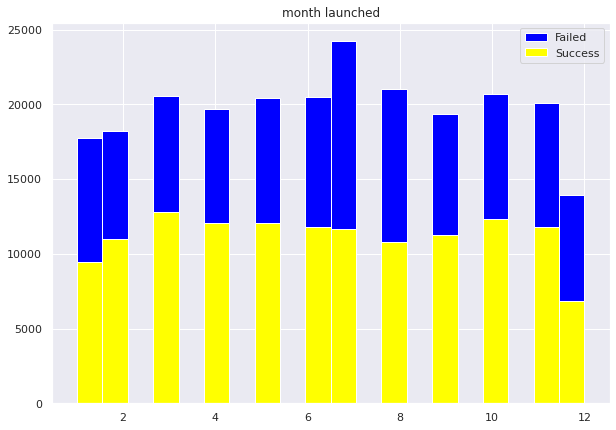

In [125]:
#month in which the project was launched

df['month_launched'] = df.launched.dt.month

q25 = df['month_launched'].quantile(0.25)
q75 = df['month_launched'].quantile(0.75)
iqr = q75 - q25


cat_in_0 = df[(df['month_launched'] > q25 - 1.5 * iqr) 
                   & (df['month_launched'] < q75 + 1.5 * iqr) 
                   & (df.state == 0)].month_launched
cat_in_1 = df[(df['month_launched'] > q25 - 1.5 * iqr)
                   & (df['month_launched'] < q75 + 1.5 * iqr)
                   & (df.state == 1)].month_launched


plt.figure(figsize = (10, 7))
plt.hist(cat_in_0, bins = 20, color = 'blue', label='Failed')
plt.hist(cat_in_1, bins = 20, color = 'yellow', label='Success')
plt.legend()
plt.title('month launched')
plt.show()

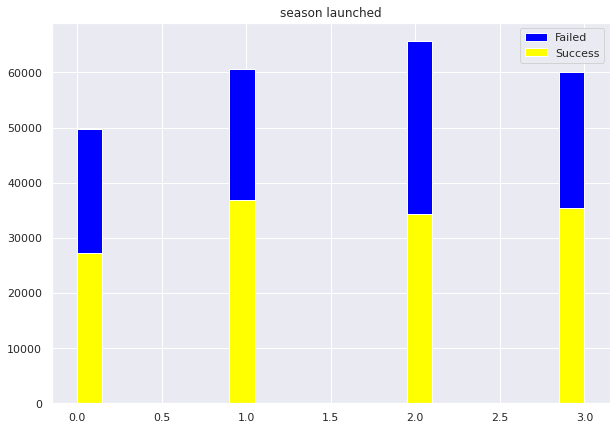

In [126]:
# unite months into seasons
df['season_launched'] = df.launched.dt.month.apply(lambda x: 0 if x in [1, 2, 12]
                                                  else 1 if x in [3, 4, 5]
                                                  else 2 if x in [6, 7, 8]
                                                  else 3)

q25 = df['season_launched'].quantile(0.25)
q75 = df['season_launched'].quantile(0.75)
iqr = q75 - q25


cat_in_0 = df[(df['season_launched'] > q25 - 1.5 * iqr) 
                   & (df['season_launched'] < q75 + 1.5 * iqr) 
                   & (df.state == 0)].season_launched
cat_in_1 = df[(df['season_launched'] > q25 - 1.5 * iqr)
                   & (df['season_launched'] < q75 + 1.5 * iqr)
                   & (df.state == 1)].season_launched


plt.figure(figsize = (10, 7))
plt.hist(cat_in_0, bins = 20, color = 'blue', label='Failed')
plt.hist(cat_in_1, bins = 20, color = 'yellow', label='Success')
plt.legend()
plt.title('season launched')
plt.show()

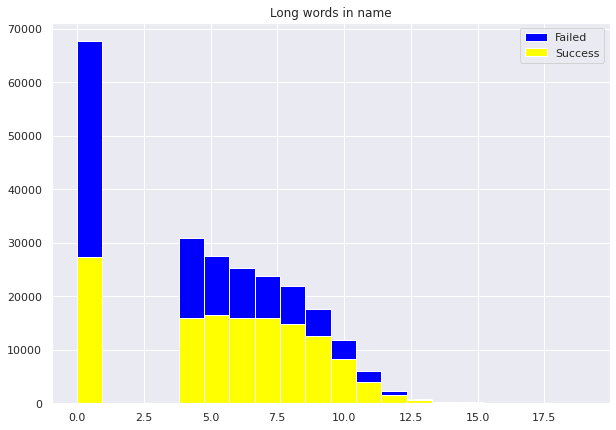

In [127]:
#calculate the amount of words in name of project that are larger than 4 spells

def name_length(x):
    length = 0
    name_list = x.split(' ')
    for i in range(len(name_list)):
        if len(name_list) >= 4:
            length += 1
    return length

df['project_name_length'] = df['name'].apply(name_length)

q25 = df['project_name_length'].quantile(0.25)
q75 = df['project_name_length'].quantile(0.75)
iqr = q75 - q25

name_length_0 = df[(df['project_name_length'] > q25 - 1.5 * iqr)
& (df['project_name_length'] < q75 + 1.5 * iqr)
& (df.state == 0)].project_name_length
name_length_1 = df[(df['project_name_length'] > q25 - 1.5 * iqr)
& (df['project_name_length'] < q75 + 1.5 * iqr)
& (df.state == 1)].project_name_length

plt.figure(figsize = (10, 7))
plt.hist(name_length_0, bins = 20, color = 'blue', label='Failed')
plt.hist(name_length_1, bins = 20, color = 'yellow', label='Success')
plt.title('Long words in name')
plt.legend()
plt.show()

### Q5.2 Train an xgboost, that's beat random forest

In [129]:
import xgboost
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

#### Simple XGBoost first, with the same features as Random Forest

In [130]:
X_old = data.drop(columns=['state'])
y_old = data['state']

X_train, X_test, y_train, y_test = train_test_split(X_old, y_old, test_size=0.25, random_state=42)

model = xgboost.XGBClassifier() 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7007184917076333


#### Now let's add created features

In [131]:
df.columns

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'goal',
       'launched', 'state', 'country', 'usd_goal_real', 'year_launched',
       'duration_days', 'region', 'name_length', 'mean_name_word_length',
       'cat_in_subcat', 'month_launched', 'season_launched',
       'project_name_length'],
      dtype='object')

In [132]:
#choosing columns
xgbdata = df.drop(columns=['name', 'cat_in_subcat', 'deadline', 'launched', 'country', 'usd_goal_real'])

#dividing into cat and num
cat_features = ['category', 'main_category', 'currency', 'region', 'season_launched']
#['category', 'main_category', 'currency', 'region']
num_features = ['goal', 'year_launched', 'duration_days', 'name_length', 
                'project_name_length', 'month_launched', 'mean_name_word_length']
#['goal', 'year_launched', 'duration_days', 'name_length']

#preprocess cat - dummies
xgbdata = pd.get_dummies(xgbdata, columns=cat_features)

#dividing into X and y
X = xgbdata.drop(columns=['state'])
y = xgbdata['state']

#splitting into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#preprocess num - scaling
scaler = StandardScaler()
scaler.fit(X_train[num_features])
X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])


In [133]:
print(cat_features, num_features)

['category', 'main_category', 'currency', 'region', 'season_launched'] ['goal', 'year_launched', 'duration_days', 'name_length', 'project_name_length', 'month_launched', 'mean_name_word_length']


In [134]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [135]:
model = xgboost.XGBClassifier() 
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [136]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7029333909567285


In [137]:
parameters = {'n_estimators': [50, 100, 150, 200]}
xgb = xgboost.XGBClassifier() 
#fold = KFold(len(y), shuffle=True, random_state=42)
    
gs = GridSearchCV(xgb, parameters, n_jobs=-1, cv=5, verbose=30)
gs.fit(X_train, y_train)
print('Grid search best parameters:', gs.best_params_)
print('Grid search best score:', gs.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed: 10.7min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  15 out o

Grid search best parameters: {'n_estimators': 100}
Grid search best score: 0.7039227216749172


In [140]:
model = xgboost.XGBClassifier(n_estimators=200) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7040570471611475

In [ ]:
print(accuracy)

#### Resulting accuracy is 0.704 which is higher than for Random Forest (0.697)